# Neural Network implementation

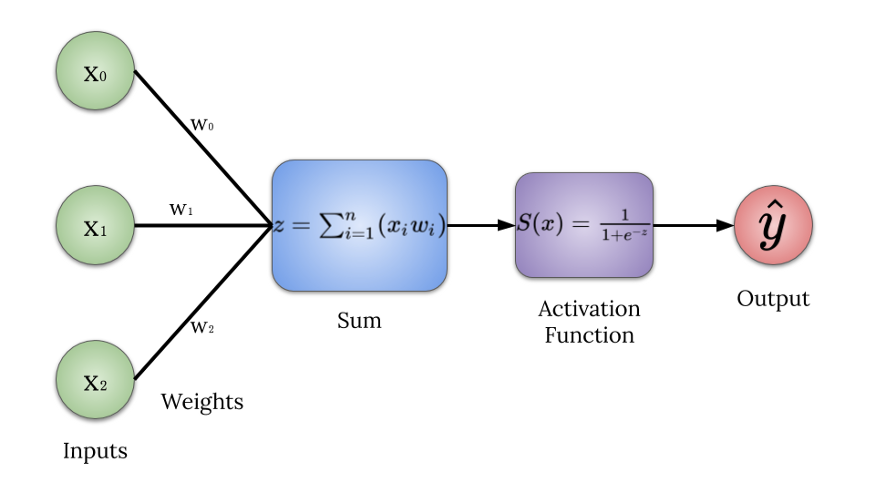

## Summarizing an Artificial Neural Network:
-Take inputs
-Add bias (if required)

-Assign random weights to input features

-Run the code for training.

-Find the error in prediction.

-Update the weight by gradient descent algorithm.

-Repeat the training phase with updated weights.

-Make predictions.

## What we want to implement

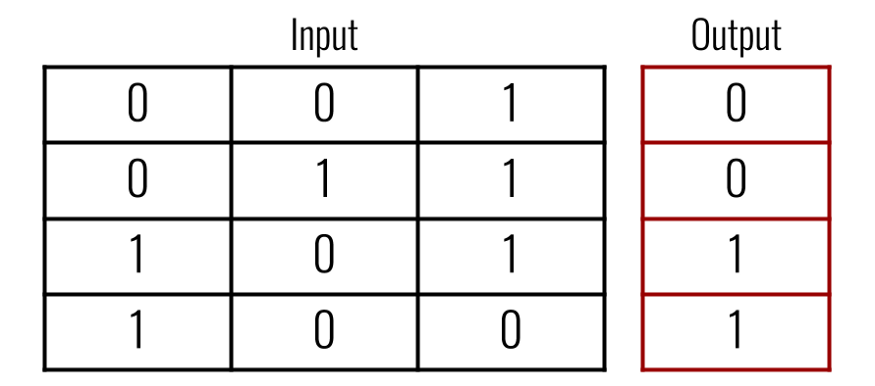

### Visualize our sigmoid function


In [25]:
import numpy as np
import matplotlib.pyplot as plt

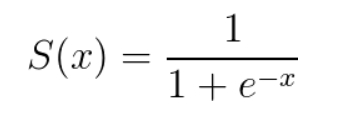

In [30]:
input = np.linspace(-10, 10, 100)
#Define sigmoid function:
def sigmoid(x):
  val = 1/(1+np.exp(-x))
  return val

Text(0.5, 1.0, 'Sigmoid Function')

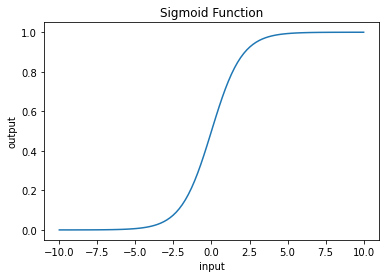

In [31]:
output = sigmoid(input)
plt.plot(input, output)
plt.xlabel('input')
plt.ylabel('output')
plt.title('Sigmoid Function')

In [51]:
# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])


In [53]:
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .5 for simplicity
        self.weights = np.array([[.5], [.5], [.5]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x) and S′(x)=S(x)⋅(1−S(x))
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.output = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error = self.output - self.outputs
        delta = self.error * self.sigmoid(self.output, deriv=True)
        self.weights -= np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

In [54]:
example = np.array([[1,0,0]])
NN.predict(example)

array([[0.99995844]])

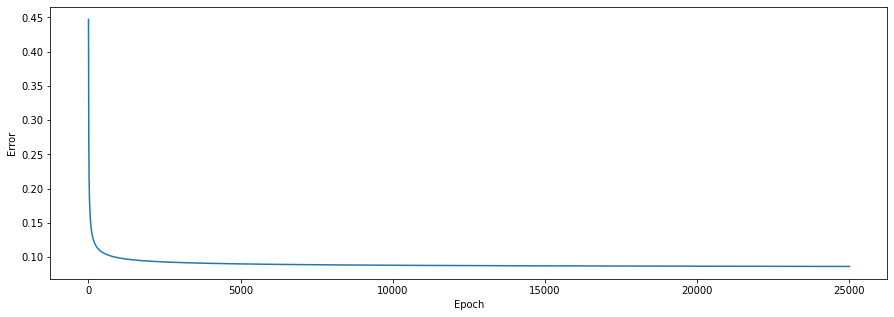

In [55]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()